<a href="https://colab.research.google.com/github/sauravkumar19/Food101_image_classification_project/blob/main/Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
dataset = tfds.list_builders()
print("food101" in dataset)


True


In [3]:
(train_data,test_data), data_info = tfds.load(
    name="food101",
    split= ["train","validation"],
    shuffle_files= True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteNBNKAT/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteNBNKAT/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [4]:
data_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [5]:
class_names = data_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [7]:
all_label = []
for _,label in test_data:
  all_label.append(label.numpy())


In [13]:
import numpy as np
all_label = np.array(all_label)

In [14]:
all_label

array([93, 83, 98, ...,  1, 52, 31])

In [15]:
one_sample = train_data.take(1)

In [16]:
one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [17]:
for image, label in one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """

  )


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 81
  Class name (str form): ramen
        


In [ ]:
# from tensorflow.keras import layers, Model
# import numpy as np

# def process_image_without_maxpooling(image):
#     processed_channels = []

#     for channel in range(image.shape[2]):
#         channel_matrix = image[:,:,channel]
#         U, S, Vt = np.linalg.svd(channel_matrix, full_matrices=False)
#         first_singular_value = S[0]
#         if np.iscomplexobj(first_singular_value):
#             first_singular_value = np.abs(first_singular_value)
#         processed_channel_matrix = U[:, :1] @ np.diag([first_singular_value]) @ Vt[:1, :]
#         processed_channels.append(processed_channel_matrix)

#     processed_image = np.stack(processed_channels, axis=-1)
#     return processed_image

# def create_model(input_shape, num_classes):
#     input_layer = layers.Input(shape=input_shape, name="input_layer")
#     x = input_layer

#     for i in range(30):
#         x = layers.Conv2D(filters=10, kernel_size=3, activation='relu')(x)
#         x = layers.Conv2D(10, 3, activation='relu')(x)

#         # Add Batch Normalization after every 5 repetitions
#         if (i + 1) % 5 == 0:
#             x = layers.BatchNormalization()(x)

#         # Add Dropout after every 10 repetitions
#         if (i + 1) % 10 == 0:
#             x = layers.Dropout(0.5)(x)

#     # Replace the last MaxPool2D layer with the image processing without max pooling
#     processed_image = layers.Lambda(process_image_without_maxpooling)(x)

#     x = layers.Flatten()(processed_image)
#     output = layers.Dense(num_classes, activation='softmax', name="output_layer")(x)

#     model = Model(input_layer, output)
#     return model

# # Assuming your input shape is (224, 224, 3) and you have 100 classes
# model_0 = create_model((224, 224, 3), 100)


In [18]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[242, 254, 252],
        [241, 253, 251],
        [240, 252, 250],
        ...,
        [241, 211, 101],
        [242, 212, 102],
        [245, 215, 105]],

       [[240, 252, 250],
        [240, 252, 250],
        [239, 251, 249],
        ...,
        [245, 215, 105],
        [242, 212, 102],
        [240, 210, 100]],

       [[238, 250, 248],
        [238, 250, 248],
        [238, 250, 248],
        ...,
        [250, 218, 107],
        [243, 211, 100],
        [238, 206,  95]],

       ...,

       [[ 82,  81,  77],
        [ 83,  82,  78],
        [ 82,  81,  77],
        ...,
        [126, 128, 127],
        [135, 137, 136],
        [139, 141, 140]],

       [[ 82,  79,  74],
        [ 82,  79,  74],
        [ 81,  78,  73],
        ...,
        [209, 209, 209],
        [217, 217, 217],
        [215, 215, 215]],

       [[ 78,  75,  70],
        [ 77,  74,  69],
        [ 76,  73,  68],
        ...,
        [187, 187, 18

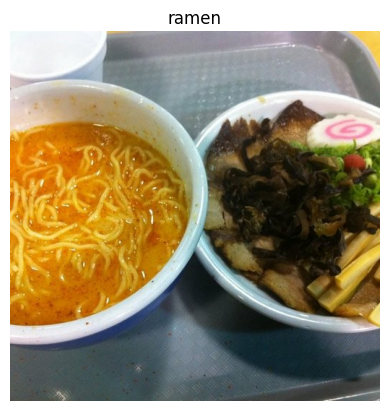

In [19]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [20]:
# For preprossess the image data, I will create a function
def preprossess_image_data(image, label, image_size = 224):
  """
  This function convert image in shape (224,224) and also change the data type of image into flote32

  arg*

  image: provide the image that you want to reshape

  Label: Label of image

  image_size: provide the size of image that's you want(by default: 224)
  """
  image = tf.image.resize(image,[image_size,image_size])
  return tf.cast(image, tf.float32), label

In [21]:
preprocessed_img = preprossess_image_data(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")


Image before preprocessing:
 [[[242 254 252]
  [241 253 251]
  [240 252 250]
  ...
  [241 211 101]
  [242 212 102]
  [245 215 105]]

 [[240 252 250]
  [240 252 250]
  [239 251 249]
  ...
  [245 215 105]
  [242 212 102]
  [240 210 100]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[240.4847  252.4847  250.4847 ]
  [238.42857 250.42857 248.42857]
  [238.29082 249.86224 248.07652]
  ...
  [251.4235  219.20923 107.78071]
  [246.3571  216.3571  106.3571 ]
  [241.92346 211.92346 101.92346]]

 [[237.07143 249.07143 247.07143]
  [238.      250.      248.     ]
  [240.14285 250.14285 249.14285]
  ...
  [248.22957 215.28569 101.85716]
  [250.99489 218.99489 106.27042]
  [243.07126 211.07126 100.07126]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


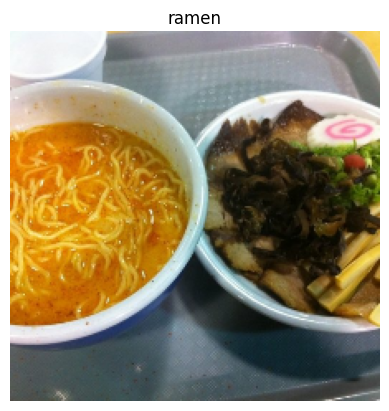

In [22]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

In [23]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprossess_image_data, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprossess_image_data, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [25]:

# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [26]:
mixed_precision.global_policy()

<Policy "mixed_float16">

##Base_Model##

Frist develope the base model not including any existing model

In [20]:
from tensorflow.keras import layers, Model

input = layers.Input(shape=(224,224,3),name= "input_layer")

x = layers.Conv2D(filters = 10,kernel_size = 3, activation = 'relu')(input)

x = layers.Conv2D(10,3, activation ='relu')(x)

x = layers.MaxPool2D()(x)#pool_size =2,padding = 'valid')(x)

x = layers.Conv2D(10,3,activation = "relu")(x)

x = layers.Conv2D(10,3,activation = "relu")(x)

x = layers.MaxPool2D()(x)#pool_size =2,padding = 'valid')(x)

x = layers.Flatten()(x)

output = layers.Dense(len(class_names), activation = 'softmax', name = "output_layer")(x)

model_0 = Model(input,output)

model_0.compile(loss = "sparse_categorical_crossentropy",
optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_0.fit(train_data,
                        epochs = 3,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/3
2368/2368 [==============================] - 268s 111ms/step - loss: 5.4748 - accuracy: 0.0186 - val_loss: 4.5525 - val_accuracy: 0.0236
Epoch 2/3
2368/2368 [==============================] - 248s 103ms/step - loss: 4.3691 - accuracy: 0.0569 - val_loss: 4.5878 - val_accuracy: 0.0235
Epoch 3/3
2368/2368 [==============================] - 261s 108ms/step - loss: 3.4061 - accuracy: 0.2303 - val_loss: 5.4682 - val_accuracy: 0.0214


In [21]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                           

In [27]:
def plot_loss_curve(history):

  ''' Plot the loss curve seprately

  args = history of model

  Return the graph of loss and accuracy for training set and testing set
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epoch = range(len(history.history['loss']))

  plt.plot(epoch,loss,label = 'training_loss')
  plt.plot(epoch,val_loss,label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.legend()

  plt.figure()
  plt.plot(epoch,accuracy,label = 'training_accuracy')
  plt.plot(epoch,val_accuracy,label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.legend()

In [26]:
# from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers.experimental import preprocessing # OLD

# # NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
# data_augmentation = tf.keras.Sequential([
#   layers.RandomFlip("horizontal"),
#   layers.RandomRotation(0.2),
#   layers.RandomZoom(0.2),
#   layers.RandomHeight(0.2),
#   layers.RandomWidth(0.2),
#   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet
# ], name ="data_augmentation")

In [28]:
from tensorflow.keras import layers, Model
input_shape = (224,224,3)
model_1 = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)
model_1.trainable = False

# Now write the model structure

input = layers.Input(shape= input_shape, name = "input_layer")
#x = data_augmentation(input) # augment our training images
x = model_1(input,training = False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
output = layers.Activation('softmax',dtype = tf.float32, name = "output_layer")(x)

model_1 = Model(input,output)

# Compile the model
model_1.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


In [29]:
checkpoint_path = "Food101/food101_checkpoint.ckpt"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path,
                                                save_best_only=True,
                                                save_weights_only=True,
                                                save_freq="epoch", # save every epoch
                                                verbose =1
                                                )

In [30]:
initial_epoch = 3
history_1 = model_1.fit(train_data,
                        epochs = initial_epoch,
                        validation_data = test_data,
                        validation_steps = int(0.15*len(test_data)),
                        callbacks = [checkpoint]
                        )

Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7177 - accuracy: 0.5815
Epoch 1: val_loss improved from inf to 1.10700, saving model to Food101/food101_checkpoint.ckpt
2368/2368 [==============================] - 222s 87ms/step - loss: 1.7177 - accuracy: 0.5815 - val_loss: 1.1070 - val_accuracy: 0.7084
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.1997 - accuracy: 0.6891
Epoch 2: val_loss improved from 1.10700 to 1.01842, saving model to Food101/food101_checkpoint.ckpt
2368/2368 [==============================] - 181s 75ms/step - loss: 1.1997 - accuracy: 0.6891 - val_loss: 1.0184 - val_accuracy: 0.7262
Epoch 3/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.0537 - accuracy: 0.7237
Epoch 3: val_loss improved from 1.01842 to 0.98742, saving model to Food101/food101_checkpoint.ckpt
2368/2368 [==============================] - 184s 76ms/step - loss: 1.0536 - accuracy: 0.7237 - val_loss: 0.9874 - val_accuracy: 0.7270


In [31]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 output_layer (Activation)   (None, 101)               0         
                                                                 
Total params: 4178952 (15.94 MB)
Trainable params: 129381 (50

In [35]:
model_1_accuracy = model_1.evaluate(test_data)
model_1_accuracy

790/790 [==============================] - 71s 90ms/step - loss: 0.9980 - accuracy: 0.7292


[0.9980226755142212, 0.7292277216911316]

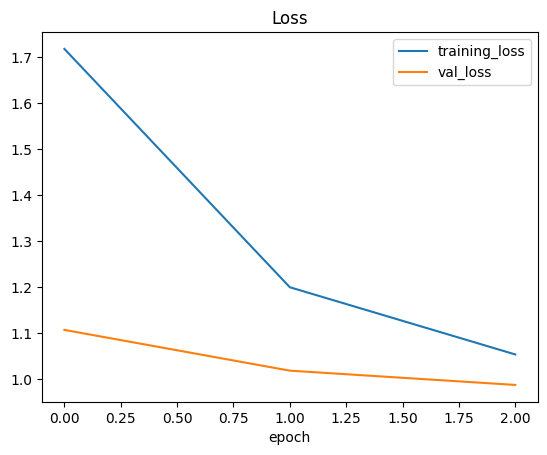

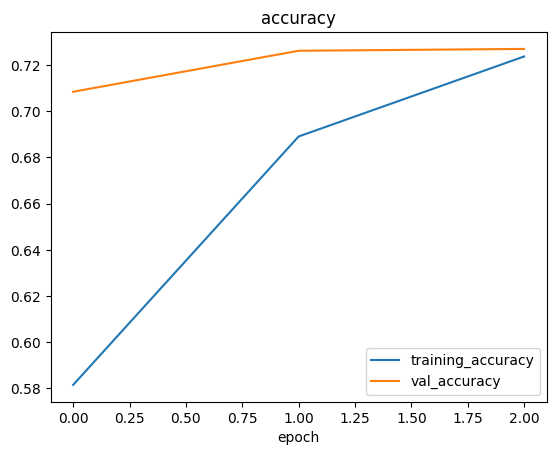

In [33]:
plot_loss_curve(history_1)

In [36]:
model_1.load_weights(checkpoint_path)
load_model_1 = model_1.evaluate(test_data)

790/790 [==============================] - 52s 65ms/step - loss: 0.9980 - accuracy: 0.7292


In [37]:
model_1.layers

In [38]:
base_model_1 = model_1.layers[1]

In [39]:
# Check the layers in the base model and see what dtype policy they're using
for layer in base_model_1.layers[-20:]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)
#base_model_1.layers

block6d_project_conv False float32 <Policy "mixed_float16">
block6d_project_bn False float32 <Policy "mixed_float16">
block6d_drop False float32 <Policy "mixed_float16">
block6d_add False float32 <Policy "mixed_float16">
block7a_expand_conv False float32 <Policy "mixed_float16">
block7a_expand_bn False float32 <Policy "mixed_float16">
block7a_expand_activation False float32 <Policy "mixed_float16">
block7a_dwconv False float32 <Policy "mixed_float16">
block7a_bn False float32 <Policy "mixed_float16">
block7a_activation False float32 <Policy "mixed_float16">
block7a_se_squeeze False float32 <Policy "mixed_float16">
block7a_se_reshape False float32 <Policy "mixed_float16">
block7a_se_reduce False float32 <Policy "mixed_float16">
block7a_se_expand False float32 <Policy "mixed_float16">
block7a_se_excite False float32 <Policy "mixed_float16">
block7a_project_conv False float32 <Policy "mixed_float16">
block7a_project_bn False float32 <Policy "mixed_float16">
top_conv False float32 <Policy 

In [40]:
base_model_1.trainable = True

for layers in base_model_1.layers[:-10]:
  base_model_1.trainable = False

#recompile the model
model_1.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
    )

In [41]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience=3, start_from_epoch = history_1.epoch[-1])
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [42]:
final_epoch = initial_epoch+5

history_1_fine_tune = model_1.fit(
    train_data,
    epochs = final_epoch,
    validation_data = test_data,
    initial_epoch = history_1.epoch[-1],
    validation_steps = int(0.15*len(test_data)),
    callbacks = [checkpoint,early_stop,reduce_lr]
)

Epoch 3/8
2368/2368 [==============================] - ETA: 0s - loss: 0.9622 - accuracy: 0.7458
Epoch 3: val_loss improved from 0.98742 to 0.96382, saving model to Food101/food101_checkpoint.ckpt
2368/2368 [==============================] - 195s 77ms/step - loss: 0.9622 - accuracy: 0.7458 - val_loss: 0.9638 - val_accuracy: 0.7352 - lr: 0.0010
Epoch 4/8
2367/2368 [============================>.] - ETA: 0s - loss: 0.8887 - accuracy: 0.7655
Epoch 4: val_loss did not improve from 0.96382
2368/2368 [==============================] - 175s 73ms/step - loss: 0.8888 - accuracy: 0.7655 - val_loss: 0.9681 - val_accuracy: 0.7338 - lr: 0.0010
Epoch 5/8
2368/2368 [==============================] - ETA: 0s - loss: 0.8318 - accuracy: 0.7792
Epoch 5: val_loss improved from 0.96382 to 0.95625, saving model to Food101/food101_checkpoint.ckpt
2368/2368 [==============================] - 181s 75ms/step - loss: 0.8318 - accuracy: 0.7792 - val_loss: 0.9563 - val_accuracy: 0.7402 - lr: 0.0010
Epoch 6/8
2367/

In [45]:
import numpy as np
def fine_tune_plot(old_history, new_history, initial_epoch = initial_epoch):
  x = range(1,final_epoch+1)

  loss = old_history.history["loss"]
  val_loss = old_history.history["val_loss"]

  accuracy = old_history.history['accuracy']
  val_acc = old_history.history["val_accuracy"]

  total_loss = loss +new_history.history["loss"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  total_accuracy = accuracy + new_history.history['accuracy']
  total_val_acc = val_acc + new_history.history["val_accuracy"]

  print(val_loss)
  print(total_val_loss)

  plt.figure(figsize= (10,7))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label = "total_loss")
  plt.plot(total_val_loss, label = "total_val_loss")
  plt.plot([initial_epoch,initial_epoch], plt.ylim(), label = "Start_fine_tune")
  plt.legend(loc = "lower right")
  plt.title("Loss")

  plt.subplot(2,1,2)
  plt.plot(total_accuracy, label = "total_accuracy")
  plt.plot(total_val_acc, label = "total_val_accuracy")
  plt.plot([initial_epoch,initial_epoch], plt.ylim(), label = "Start_fine_tune")
  plt.legend(loc = "lower right")
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.show()


[1.1070042848587036, 1.0184201002120972, 0.9874249696731567]
[1.1070042848587036, 1.0184201002120972, 0.9874249696731567, 0.9638223648071289, 0.9681347608566284, 0.9562505483627319, 0.9753727912902832, 0.973345160484314, 0.954181432723999]


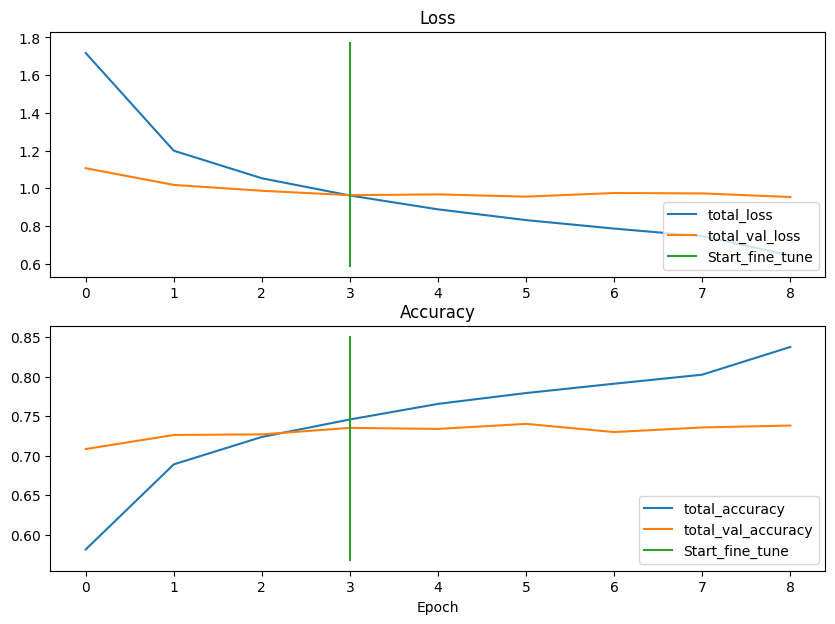

In [46]:
fine_tune_plot(history_1, history_1_fine_tune)